In [33]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [34]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
df = df.drop(columns = ['Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [36]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [37]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

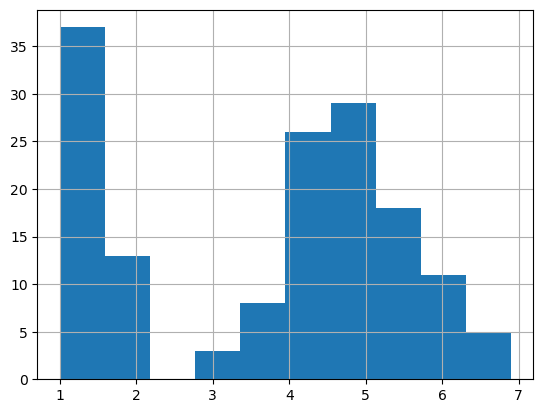

In [38]:
df['PetalLengthCm'].hist()

<Axes: >

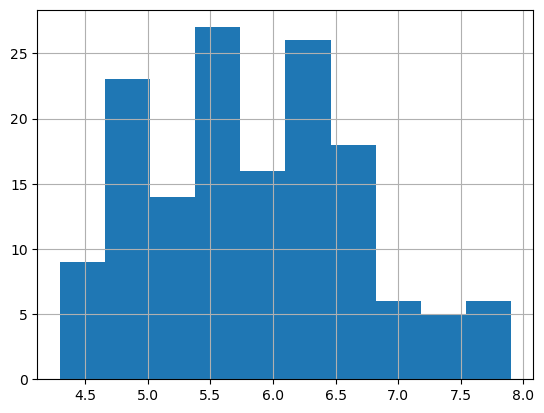

In [39]:
df['SepalLengthCm'].hist()

<Axes: >

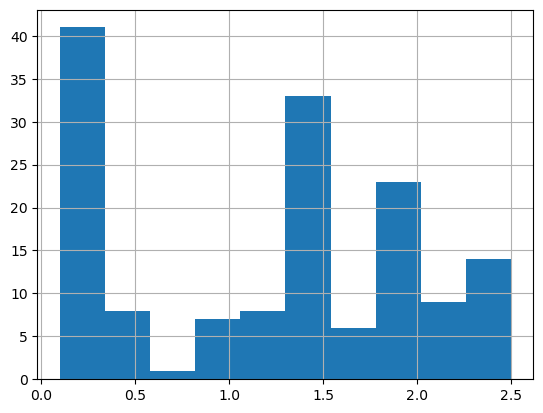

In [40]:
df['PetalWidthCm'].hist()

<Axes: >

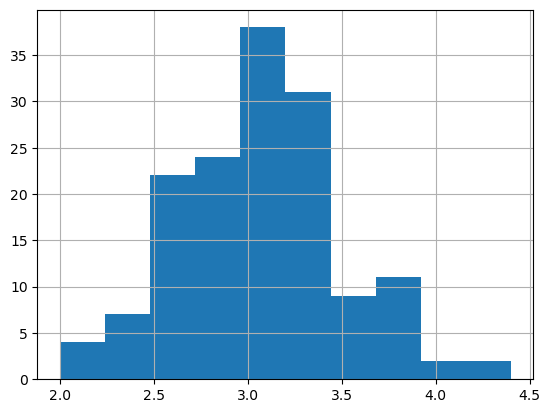

In [41]:
df['SepalWidthCm'].hist()

In [42]:
#scatterplots

colors = ['blue', 'green', 'red']
species = ['Iris-setosa',
'Iris-versicolor',
'Iris-virginica']

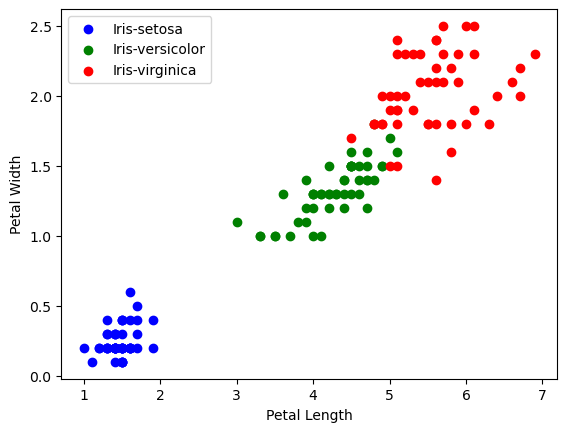

In [43]:
for i in range(3):
    x = df[df['Species']== species[i]]
    plt.scatter(x['PetalLengthCm'], x['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()

In [44]:
#label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [45]:
df['Species'] = le.fit_transform(df['Species'])
df.head()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [46]:
#model training 

from sklearn.model_selection import train_test_split
# train - 75
# test - 25
X = df.drop(columns = ['Species'])
Y = df['Species']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [47]:
#linear regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [48]:
#model training
model.fit(x_train, y_train)

LinearRegression()

In [49]:
#print metric to get performance
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  91.8597583287542


In [50]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [51]:
model.fit(x_train, y_train)

KNeighborsClassifier()

In [52]:
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  97.36842105263158


In [53]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [54]:
y_test_pred = model.predict(x_test)
y_test_pred

array([1, 1, 0, 2, 2, 0, 1, 1, 1, 2, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 1, 1,
       1, 2, 0, 1, 2, 0, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1])

In [56]:
#confusion matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
model.classes_

array([0, 1, 2])

Confusion Matrix:
 [[ 9  0  0]
 [ 0 14  1]
 [ 0  0 14]]


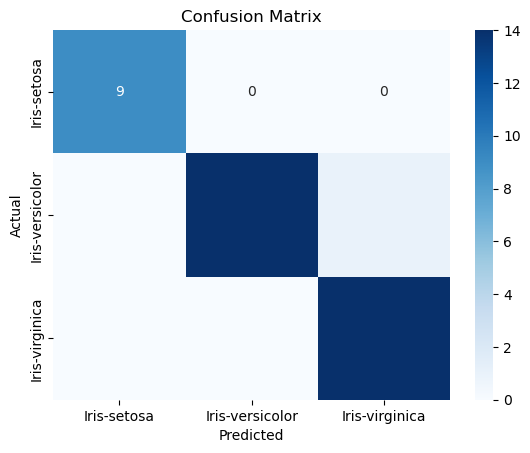

In [66]:
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", cm)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [67]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [68]:
model.fit(x_train, y_train)
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  94.73684210526315


In [69]:
#random forest alg
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

In [70]:
model.fit(x_train, y_train)
print("Accuracy: ", model.score(x_test, y_test) * 100)

Accuracy:  94.73684210526315
